# Задача 1.

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
np.set_printoptions(precision=4)

In [127]:
# функция для расчета стационарного решения
# решение системы omega*theta=omega с условием нормировки sum(omega)=1
def stationary_distribution(matrix, eps):
    L=matrix.shape[0]
    omega_0 = np.ones(matrix.shape[0])/(L)
    omega_current = omega_0 @ matrix
    while(np.linalg.norm(omega_0 - omega_current)>eps):
        omega_0=omega_current
        omega_current = omega_current @ matrix
    return omega_current

In [128]:
# коэффициенты использования систем
def get_psi(lmbds, kappa, mu):
    psi = np.zeros(L)
    for i in range(L):
        psi[i] = lmbds[i]/(kappa[i]*mu[i])
    return psi

In [129]:
def get_properties(L, N, mu, theta):
    omega = stationary_distribution(theta, 0.0001)
    
    # м.о. числа требований в системах
    s = np.zeros((N+1, L))
    # м.о. длительности пребывания требований в системах
    u = np.zeros((N+1, L))
    # м.о. длительности ожидания требований в очереди системы
    w = np.zeros(L)
    # м.о. числа требований, ожидающих обслуживание в очереди системы
    b = np.zeros(L)
    # м.о. числа занятых приборов в системах
    h = np.zeros(L)
    # интенсивность входящего потока требований в системы
    lmbds = np.zeros(L)
    # коэффициенты использования систем
    psi = np.zeros(L)
    
    for Y in range(1, N + 1):
        for i in range(L):
            u[Y][i] = 1 / mu[i] * (s[Y-1][i] + 1)
        for i in range(L):
            summa = 0
            for j in range(L):
                summa += omega[j] * u[Y][j]
            s[Y][i] = omega[i] * u[Y][i] * Y / summa

    for i in range(L):
        w[i] = u[N][i] - (1 / mu[i])
        b[i] = s[N][i] * w[i] / u[N][i]
        h[i] = s[N][i] - b[i]
        lmbds[i] = h[i] * mu[i]
        psi[i] = lmbds[i] / mu[i]
            
    return s[N], u[N], lmbds, psi

In [130]:
def checking_for_identical_elements(_list):
    delta = 0.01
    for i in range(1, len(_list)):
        if abs(_list[0] - _list[i]) > delta:
            return True
    return False

In [131]:
L = 6
N = 12 # число требований в сети
mu = np.linspace(3, 6, 6)
theta = np.array([[0, 0.7, 0.3, 0, 0, 0],
                  [0, 0, 0.6, 0, 0, 0.4],
                  [0, 0, 0, 0.5, 0.5, 0],
                  [0, 0, 0, 0, 0.3, 0.7],
                  [0, 0, 0, 0, 0, 1],
                  [1, 0, 0, 0, 0, 0]])

In [132]:
# нахождение вектора omega
omega = stationary_distribution(theta, 0.0001)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.2354 0.1648 0.1695 0.0848 0.1102 0.2354],
Check (~1): 0.9999999999999994


In [133]:
# интенсивность обслуживания во 3-й системе
mu_to_plot = np.linspace(1, 50, 20)
s_list = []
u_list = []
lmbd_list = []
for mu_3 in mu_to_plot:
    mu[2] = mu_3
    properties = get_properties(L, N, mu, theta)
    s_list.append(properties[0])
    u_list.append(properties[1])
    lmbd_list.append(properties[2])
s_list = np.array(s_list)
s_list = np.transpose(s_list)
u_list = np.array(u_list)
u_list = np.transpose(u_list)
lmbd_list = np.array(lmbd_list)
lmbd_list = np.transpose(lmbd_list)

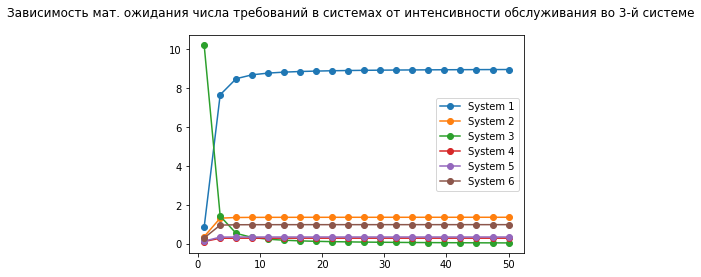

In [134]:
for i, s in enumerate(s_list):
    plt.plot(mu_to_plot, s, 'o-', label=f'System {i + 1}')
plt.suptitle(f'Зависимость мат. ожидания числа требований в системах от интенсивности обслуживания во 3-й системе')
plt.legend()
plt.show()

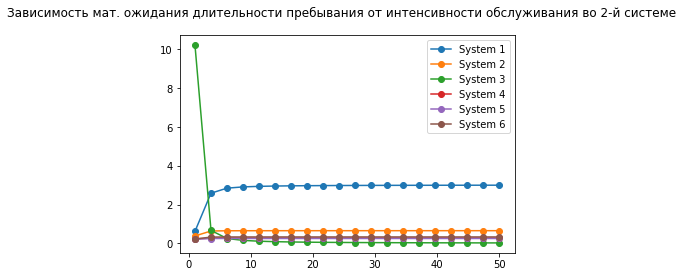

In [135]:
for i, u in enumerate(u_list):
    plt.plot(mu_to_plot, u, 'o-', label=f'System {i + 1}')
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

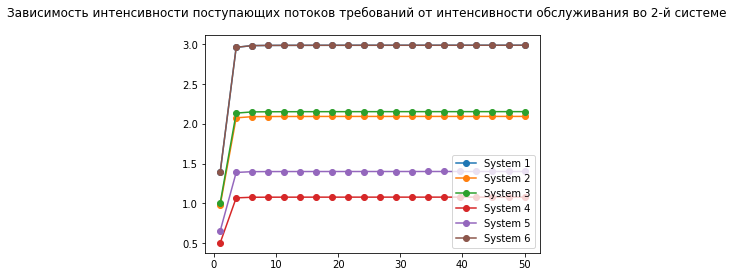

In [136]:
for i, lmbds in enumerate(lmbd_list):
    plt.plot(mu_to_plot, lmbds, 'o-', label=f'System {i + 1}')
plt.suptitle(f'Зависимость интенсивности поступающих потоков требований от интенсивности обслуживания во 2-й системе')
plt.legend()
plt.show()

In [137]:
# интенсивность обслуживания в 6-й системе
mu_to_plot = np.linspace(1, 50, 20)
s_list = []
u_list = []
lmbd_list = []
for mu_6 in mu_to_plot:
    mu[5] = mu_6
    properties = get_properties(L, N, mu, theta)
    s_list.append(properties[0])
    u_list.append(properties[1])
    lmbd_list.append(properties[2])
s_list = np.array(s_list)
s_list = np.transpose(s_list)
u_list = np.array(u_list)
u_list = np.transpose(u_list)
lmbd_list = np.array(lmbd_list)
lmbd_list = np.transpose(lmbd_list)

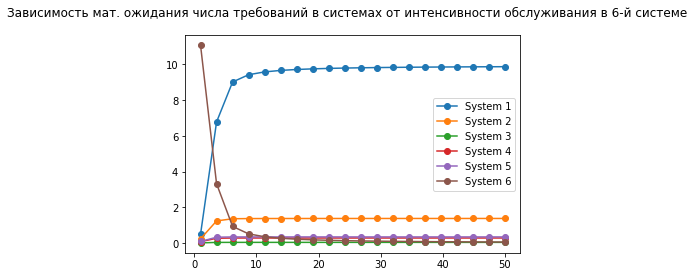

In [138]:
for i, s in enumerate(s_list):
    plt.plot(mu_to_plot, s, 'o-', label=f'System {i + 1}')
plt.suptitle(f'Зависимость мат. ожидания числа требований в системах от интенсивности обслуживания в 6-й системе')
plt.legend()
plt.show()

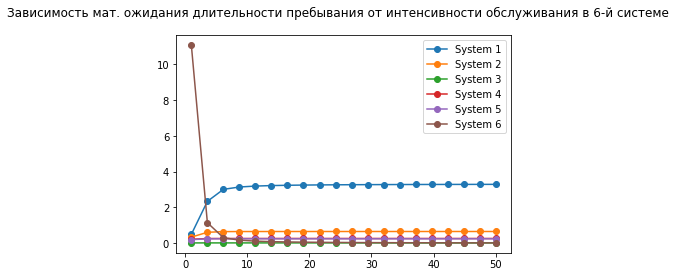

In [139]:
for i, u in enumerate(u_list):
    plt.plot(mu_to_plot, u, 'o-', label=f'System {i + 1}')
plt.suptitle(f'Зависимость мат. ожидания длительности пребывания от интенсивности обслуживания в 6-й системе')
plt.legend()
plt.show()

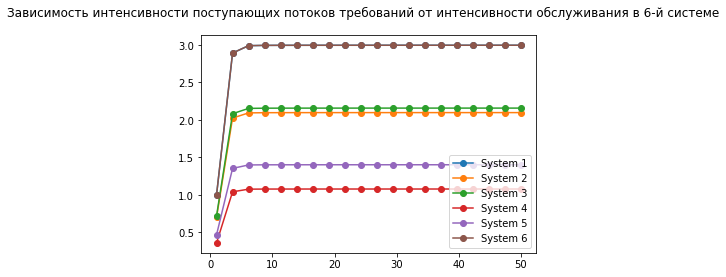

In [140]:
for i, lmbds in enumerate(lmbd_list):
    plt.plot(mu_to_plot, lmbds, 'o-', label=f'System {i + 1}')
plt.suptitle(f'Зависимость интенсивности поступающих потоков требований от интенсивности обслуживания в 6-й системе')
plt.legend()
plt.show()

# Задача 2.

## A)

In [141]:
L = 6
N = 24 # число требований в сети
mu = np.array([1]*L)
theta = np.array([[0, 0.7, 0.3, 0, 0, 0],
                  [0, 0, 0.6, 0, 0, 0.4],
                  [0, 0, 0, 0.5, 0.5, 0],
                  [0, 0, 0, 0, 0.3, 0.7],
                  [0, 0.2, 0, 0, 0, 0.8],
                  [0.5, 0, 0.5, 0, 0, 0]])

In [142]:
omega = stationary_distribution(theta, 0.0001)
print(f'Omegas: {omega},\nCheck (~1): {sum(omega)}')

Omegas: [0.1257 0.1185 0.2345 0.1173 0.1525 0.2515],
Check (~1): 1.0


In [143]:
h = 0.01
s = get_properties(L, N, mu, theta)[0]
mu_temp = np.array([1.]*L)
cnt = 0

while checking_for_identical_elements(s):
    s = get_properties(L, N, mu_temp, theta)[0]
    
    s_max = max(s)
    s_min = min(s)
    i, = np.where(s == s_min)
    j, = np.where(s == s_max)

    cnt += 1
    if cnt % 50 == 0:
        i = random.randint(0, len(s) - 1)
        j = random.randint(0, len(s) - 1)
        if s[i] > s[j]:
            i, j = j, i
        s_min = s[i]
        s_max = s[j]


    delta = min(mu_temp[i], mu_temp[j])
    gamma = random.random() * delta * (s_max - s_min) / s_max
    mu_temp[i] -= gamma
    mu_temp[j] += gamma
print(f"\nВектор mu: {mu_temp}\nМ.о. числа требований в системах: {s}")


Вектор mu: [0.7542 0.7111 1.4072 0.7036 0.9148 1.5092]
М.о. числа требований в системах: [4.0004 4.0072 4.0009 3.9936 4.0001 3.9979]


## Б)

In [144]:
def find_psi(L, N, mu, theta):
    for v1 in np.arange(.1, 1., .1):
        for v2 in np.arange(.1, 1., .1):
            for v3 in np.arange(.1, 1., .1):
                for v4 in np.arange(.1, 1., .1):
                    for v5 in np.arange(.1, 1., .1):
                        for v6 in np.arange(.1, 1., .1):
                            for v7 in np.arange(.1, 1., .1):
                                theta[0][1], theta[0][3] = v1, 1 - v1
                                theta[1][2], theta[1][4] = v2, 1 - v2
                                theta[2][3], theta[2][5] = v3, 1 - v3
                                theta[3][4], theta[3][6] = v4, 1 - v4
                                theta[4][0], theta[4][5] = v5, 1 - v5
                                theta[5][1], theta[5][6] = v6, 1 - v6
                                theta[6][0], theta[6][2] = v7, 1 - v7
                                psi = get_properties(L, N, mu, theta)[3]
                                if not checking_for_identical_elements(psi):
                                    return psi

In [145]:
#начальные условия
L = 7
N = 24
mu = [1., 1., 1., 1., 1., 1., 1.]
theta = np.array([
    [0, 0.7, 0, 0.3, 0, 0, 0],
    [0, 0, 0.1, 0, 0.9, 0, 0],
    [0, 0, 0, 0.4, 0, 0.6, 0],
    [0, 0, 0, 0, 0.2, 0, 0.8],
    [0.5, 0, 0, 0, 0, 0.5, 0],
    [0, 0.8, 0, 0, 0, 0, 0.2],
    [0.4, 0, 0.6, 0, 0, 0, 0]
])

In [146]:
ans_psi = find_psi(L, N, mu, theta)
print('psi:\n', ans_psi)
print()
print('theta:\n', theta)

psi:
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8]

theta:
 [[0.  0.1 0.  0.9 0.  0.  0. ]
 [0.  0.  0.1 0.  0.9 0.  0. ]
 [0.  0.  0.  0.1 0.  0.9 0. ]
 [0.  0.  0.  0.  0.1 0.  0.9]
 [0.9 0.  0.  0.  0.  0.1 0. ]
 [0.  0.9 0.  0.  0.  0.  0.1]
 [0.1 0.  0.9 0.  0.  0.  0. ]]
